In [1]:
# Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
# Read dataset
car_price_df = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
car_price_df.head(5)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
car_price_df.shape

(205, 26)

In [5]:
car_price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### No column has missing values

In [6]:
car_price_df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
# Drop car_ID as it is not reqiured
car_price_df.drop('car_ID', axis=1, inplace=True)

In [8]:
# Get all numerical columns
num_columns = list(filter(lambda x : x not in ['symboling'] and car_price_df[x].dtype in ['float64', 'int64'], car_price_df.columns))

In [9]:
len(num_columns)

14

### Checking outliers

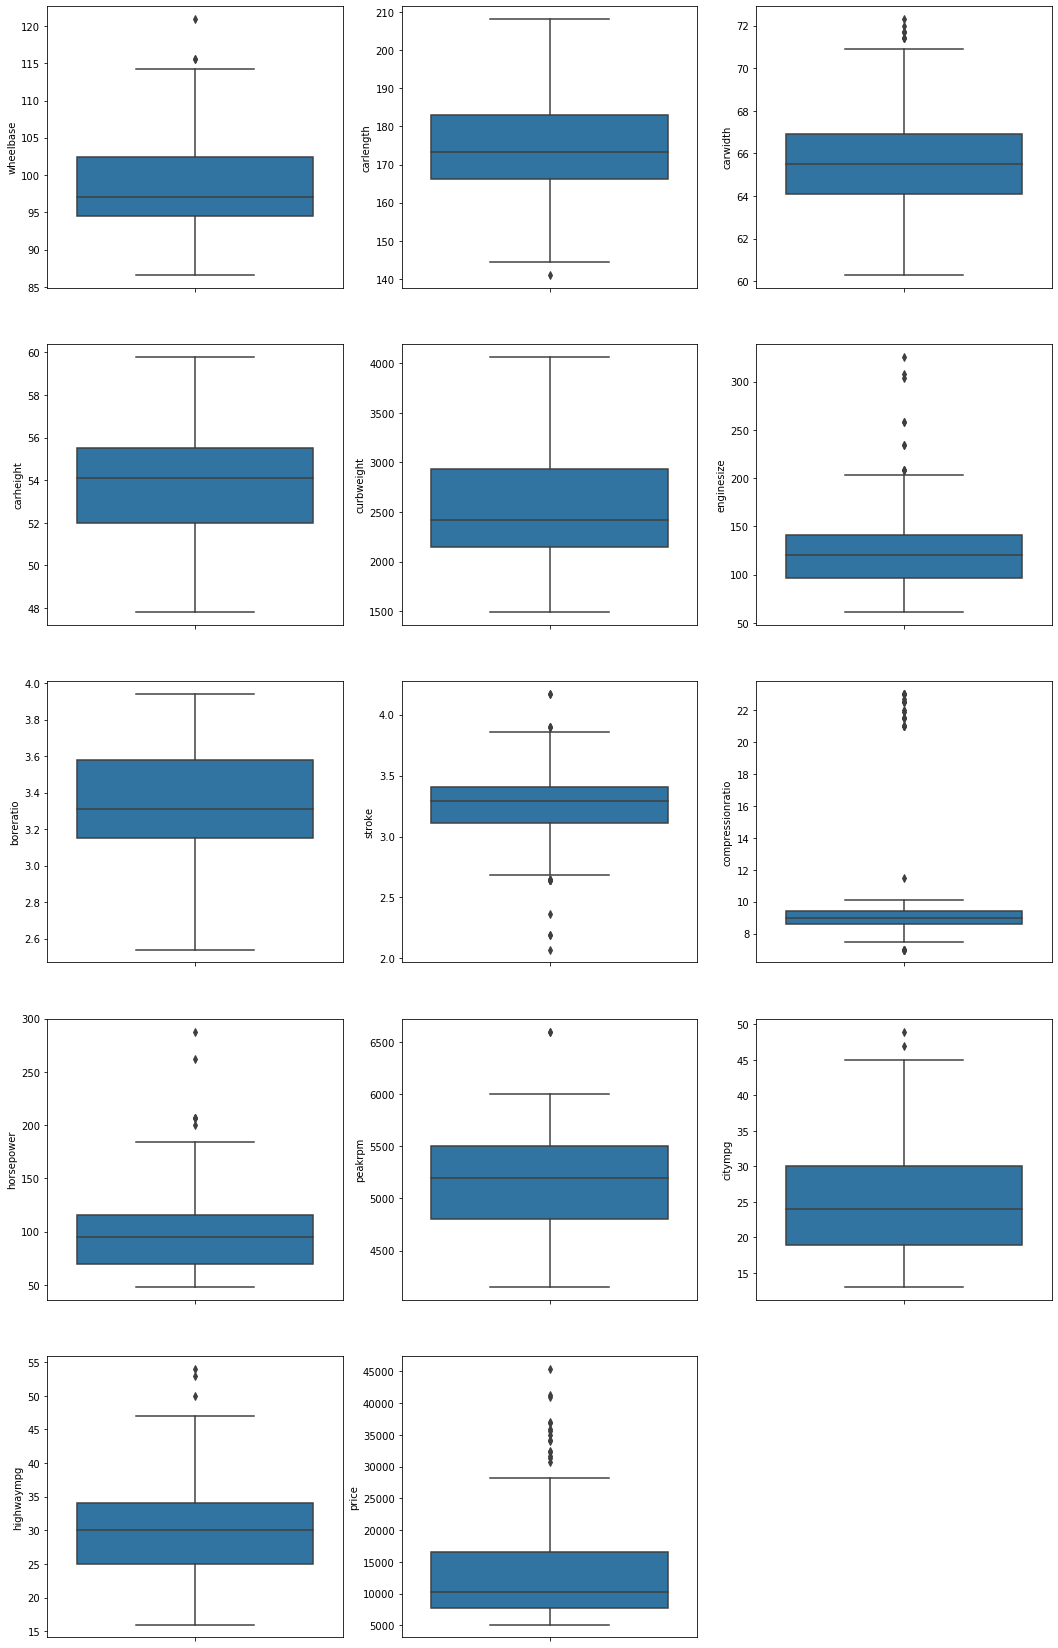

In [10]:
plt.figure(figsize=(18,30))
for i,col in enumerate(num_columns):
    plt.subplot(5,3,i+1)
    sns.boxplot(y = car_price_df[col])
    
plt.show()

#### Drive Car Company and Model from CarName

In [11]:
carname = car_price_df['CarName'].str.split(' ', n = 1, expand = True)
company = carname[0]

# Drop CarName
car_price_df.drop('CarName', axis = 1, inplace = True)
car_price_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Analyzing Car Company

In [12]:
company.value_counts().sort_index()

Nissan          1
alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
maxda           2
mazda          15
mercury         1
mitsubishi     13
nissan         17
peugeot        11
plymouth        7
porcshce        1
porsche         4
renault         2
saab            6
subaru         12
toyota         31
toyouta         1
vokswagen       1
volkswagen      9
volvo          11
vw              2
Name: 0, dtype: int64

Here you can see there are some issue in data.There are few companies present with the different spellings the data.
So Let's fix those

<table>
    <tr>
        <td>List of companies</td>
        <td>Final Name</td>
    </tr>
    <tr>
        <td>maxda, mazda</td>
        <td>mazda</td>
    <tr>
        <td>Nissan, nissan</td>
        <td>nissan</td>
    </tr>
    <tr>
        <td>porcshce, porsche</td>
        <td>porsche</td>
    </tr>
    <tr>
        <td>toyota, toyouta</td>
        <td>toyota</td>
    </tr>
    <tr>
        <td>vokswagen, volkswagen, vw</td>
        <td>volkswagen</td>
    </tr>
</table>  

In [13]:
company.replace(to_replace={'maxda': 'mazda', 'Nissan': 'nissan', 'porcshce': 'porsche', 
                            'toyouta': 'toyota', 'vokswagen': 'volkswagen', 'vw': 'volkswagen'}, inplace = True)
company.value_counts().sort_index()

alfa-romero     3
audi            7
bmw             8
buick           8
chevrolet       3
dodge           9
honda          13
isuzu           4
jaguar          3
mazda          17
mercury         1
mitsubishi     13
nissan         18
peugeot        11
plymouth        7
porsche         5
renault         2
saab            6
subaru         12
toyota         32
volkswagen     12
volvo          11
Name: 0, dtype: int64

In [14]:
car_price_df['Company'] = company
car_price_df

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,2,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0,volvo
201,-1,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,...,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0,volvo
202,-1,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,...,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0,volvo
203,-1,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,...,idi,3.01,3.40,23.0,106,4800,26,27,22470.0,volvo


### Dummy Variables


In [15]:
cat_columns = ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'enginetype',
              'cylindernumber', 'fuelsystem', 'Company']

In [16]:
for col in cat_columns:
    category = pd.get_dummies(car_price_df[col], drop_first = True)
    category.rename(mapper = lambda x: f'{col}_{x}', axis = 1, inplace = True)
    car_price_df = pd.concat([car_price_df, category], axis = 1)
    car_price_df.drop(col, axis = 1, inplace = True)
    
car_price_df.head(5)

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,0,0,0,0,0,0,0,0,0,0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,0,0,0,0,0,0,0,0,0,0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,0,0,0,0,0,0,0,0,0,0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,0,0,0,0,0,0,0,0,0,0


## Splitting the data into Training and Test data set

In [17]:
# import required library
from sklearn.model_selection import train_test_split

In [18]:
df_train, df_test = train_test_split(car_price_df, train_size = 0.7, test_size = 0.3, random_state = 100)

## Rescalling the features

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [20]:
df_train.loc[:,num_columns] = scaler.fit_transform(df_train.loc[:,num_columns])
df_train

c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
122,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,0.230159,0.525253,0.15000,0.083333,...,0,0,1,0,0,0,0,0,0,0
125,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,1.000000,0.464646,0.15625,0.395833,...,0,0,0,1,0,0,0,0,0,0
166,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,0.444444,0.449495,0.15000,0.266667,...,0,0,0,0,0,0,0,1,0,0
1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,0.626984,0.247475,0.12500,0.262500,...,0,0,0,0,0,0,0,0,0,0
199,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,0.746032,0.484848,0.03125,0.475000,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.508943,0.425000,0.336283,0.354926,0.184906,0.388889,0.641414,0.03125,0.283333,...,0,0,0,0,0,0,0,0,0,0
103,0.475862,0.707317,0.516667,0.646018,0.609775,0.452830,0.595238,0.545455,0.12500,0.433333,...,1,0,0,0,0,0,0,0,0,0
67,0.806897,0.809756,0.833333,0.769912,0.786268,0.460377,0.714286,0.732323,0.90625,0.312500,...,0,0,0,0,0,0,0,0,0,0
24,0.244828,0.263415,0.291667,0.247788,0.185803,0.109434,0.230159,0.525253,0.15000,0.083333,...,0,0,0,0,0,0,0,0,0,0


In [21]:
corr = df_train.corr()
#plt.figure(figsize=(200,300))
#sns.heatmap(corr, annot = True)
#plt.show()
print(corr)

                    wheelbase  carlength  carwidth  carheight  curbweight  \
wheelbase            1.000000   0.877909  0.796888   0.555524    0.792815   
carlength            0.877909   1.000000  0.846307   0.454721    0.881495   
carwidth             0.796888   0.846307  1.000000   0.245022    0.873884   
carheight            0.555524   0.454721  0.245022   1.000000    0.272388   
curbweight           0.792815   0.881495  0.873884   0.272388    1.000000   
...                       ...        ...       ...        ...         ...   
Company_saab         0.014215   0.153722  0.043796   0.153810    0.057941   
Company_subaru      -0.101395  -0.080658 -0.102745   0.002497   -0.115061   
Company_toyota      -0.004621  -0.040208 -0.136127   0.101964   -0.041279   
Company_volkswagen  -0.026522  -0.005208 -0.014381   0.118105   -0.064348   
Company_volvo        0.288038   0.256437  0.209624   0.217012    0.196516   

                    enginesize  boreratio    stroke  compressionratio  \
wh

## Dividing into X and y set for model building

In [22]:
y_train = df_train.pop('price')
X_train = df_train

## Building Model

### RFE

In [23]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [24]:
lm = LinearRegression()
lm.fit(X_train, y_train)

# Let's start with 12 features
rfe = RFE(lm, 12)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('wheelbase', False, 11),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 13),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', True, 1),
 ('stroke', True, 1),
 ('compressionratio', False, 22),
 ('horsepower', False, 6),
 ('peakrpm', False, 8),
 ('citympg', False, 32),
 ('highwaympg', False, 23),
 ('symboling_-1', False, 34),
 ('symboling_0', False, 44),
 ('symboling_1', False, 46),
 ('symboling_2', False, 45),
 ('symboling_3', False, 47),
 ('fueltype_gas', False, 26),
 ('aspiration_turbo', False, 10),
 ('doornumber_two', False, 49),
 ('carbody_hardtop', False, 28),
 ('carbody_hatchback', False, 27),
 ('carbody_sedan', False, 29),
 ('carbody_wagon', False, 30),
 ('drivewheel_fwd', False, 54),
 ('drivewheel_rwd', False, 36),
 ('enginelocation_rear', True, 1),
 ('enginetype_dohcv', False, 9),
 ('enginetype_l', False, 5),
 ('enginetype_ohc', False, 51),
 ('enginetype_ohcf', False, 19),
 ('enginetype_ohcv', False, 43),
 ('enginetype_rotor', True,

In [25]:
# Columns selected through RFE

col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'enginelocation_rear', 'enginetype_rotor', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'Company_bmw',
       'Company_porsche'],
      dtype='object')

## Building model using statsmodel

In [26]:
import statsmodels.api as sm

In [27]:
def build_model(columns):
    X_train_temp = X_train[columns]
    X_train_temp = sm.add_constant(X_train_temp)
    lm = sm.OLS(y_train, X_train_temp).fit()
    print(lm.summary())
    return X_train_temp, lm

In [28]:
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           6.86e-65
Time:                        11:12:00   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

Here R-quared is very high , it may case of **overfitting**

### Checking VIF

In [29]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [30]:
def calc_vif():
    vif = pd.DataFrame()
    vif['Features'] = X_train_new.columns
    vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = 'VIF', ascending = False)
    print(vif)

In [31]:
calc_vif()

                 Features    VIF
7        enginetype_rotor    inf
10     cylindernumber_two    inf
0                   const  27.65
2              curbweight   9.36
3              enginesize   8.24
1                carwidth   4.99
4               boreratio   2.21
12        Company_porsche   1.83
9   cylindernumber_twelve   1.76
6     enginelocation_rear   1.67
5                  stroke   1.51
11            Company_bmw   1.17
8    cylindernumber_three   1.05


c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Here you can see, enginetype_rotor has low p-value but VIF is infinite so, lets remove that from Features

### Model - 2

In [32]:
col = col.drop('enginetype_rotor')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.916
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     130.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           6.86e-65
Time:                        11:12:01   Log-Likelihood:                 194.22
No. Observations:                 143   AIC:                            -364.4
Df Residuals:                     131   BIC:                            -328.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.10

Even though we dropped enginetype_rotor but R-squared is almost same.
Lets check VIF again

In [33]:
calc_vif()

                 Features    VIF
0                   const  27.65
2              curbweight   9.36
3              enginesize   8.24
1                carwidth   4.99
4               boreratio   2.21
11        Company_porsche   1.83
8   cylindernumber_twelve   1.76
6     enginelocation_rear   1.67
5                  stroke   1.51
9      cylindernumber_two   1.28
10            Company_bmw   1.17
7    cylindernumber_three   1.05


curbweight also has high VIF and even though p-value is low but as other features have even lower p-value. So let's drop curbweight

### Model-3 

In [34]:
col = col.drop('curbweight')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     130.6
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.19e-63
Time:                        11:12:01   Log-Likelihood:                 187.71
No. Observations:                 143   AIC:                            -353.4
Df Residuals:                     132   BIC:                            -320.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

Again there is not much affect on R-squared value which is good

In [35]:
calc_vif()

                 Features    VIF
0                   const  27.44
2              enginesize   4.87
1                carwidth   3.29
3               boreratio   2.13
5     enginelocation_rear   1.67
10        Company_porsche   1.67
7   cylindernumber_twelve   1.63
4                  stroke   1.50
8      cylindernumber_two   1.21
9             Company_bmw   1.17
6    cylindernumber_three   1.05


If you see 'Company_porsche' it has low VIF but p-value is high as compared to others , So let's drop that and check the results

### Model-4

In [36]:
col = col.drop('Company_porsche')
X_train_new, lm = build_model(col)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     142.2
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           9.26e-64
Time:                        11:12:01   Log-Likelihood:                 185.92
No. Observations:                 143   AIC:                            -351.8
Df Residuals:                     133   BIC:                            -322.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.11

**Here also there is not much affect on R-squared, which is good**

In [37]:
calc_vif()

                Features    VIF
0                  const  27.02
2             enginesize   4.86
1               carwidth   3.25
3              boreratio   2.07
7  cylindernumber_twelve   1.63
4                 stroke   1.49
8     cylindernumber_two   1.20
9            Company_bmw   1.16
5    enginelocation_rear   1.15
6   cylindernumber_three   1.05


## Residual Analysis

In [38]:
y_train_price = lm.predict(X_train_new)

Text(0.5, 0, 'Errors')

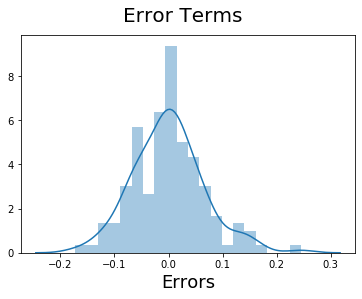

In [39]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle('Error Terms', fontsize = 20)
plt.xlabel('Errors', fontsize=18)

**Errors are normally distributed**

### Making Predictions

In [40]:
df_test[num_columns] = scaler.transform(df_test[num_columns])

<ipython-input-40-9f50385964f2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_columns] = scaler.transform(df_test[num_columns])
c:\users\ragnar\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [41]:
df_test.describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_nissan,Company_peugeot,Company_plymouth,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_volkswagen,Company_volvo
count,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,0.556580,0.544314,0.209375,0.248858,...,0.064516,0.048387,0.048387,0.032258,0.0,0.048387,0.016129,0.193548,0.080645,0.080645
std,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,0.228484,0.160738,0.273690,0.163376,...,0.247676,0.216335,0.216335,0.178127,0.0,0.216335,0.127000,0.398304,0.274512,0.274512
min,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,-0.111111,-0.060606,0.000000,0.016667,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,0.404762,0.484848,0.093750,0.107292,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,0.563492,0.585859,0.125000,0.218750,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,0.746032,0.641414,0.150000,0.295833,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,0.888889,0.863636,1.000000,0.662500,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
# Diving X_test and y_test
y_test = df_test.pop('price')
X_test = df_test

In [43]:
X_test = X_test[col]
X_test = sm.add_constant(X_test)

In [44]:
y_pred = lm.predict(X_test)

## Model Prediction


Lets plot graph between actual and predictes values

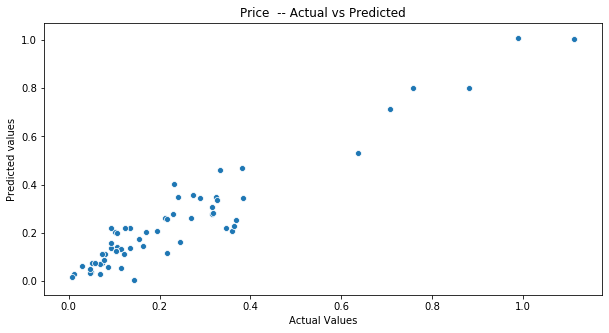

In [57]:
plt.figure(figsize = (10,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted values')
plt.title('Price  -- Actual vs Predicted')
plt.show()

In [49]:
help(ax)

Help on AxesSubplot in module matplotlib.axes._subplots object:

class AxesSubplot(SubplotBase, matplotlib.axes._axes.Axes)
 |  AxesSubplot(fig, *args, **kwargs)
 |  
 |  Base class for subplots, which are :class:`Axes` instances with
 |  additional methods to facilitate generating and manipulating a set
 |  of :class:`Axes` within a figure.
 |  
 |  Method resolution order:
 |      AxesSubplot
 |      SubplotBase
 |      matplotlib.axes._axes.Axes
 |      matplotlib.axes._base._AxesBase
 |      matplotlib.artist.Artist
 |      builtins.object
 |  
 |  Methods inherited from SubplotBase:
 |  
 |  __init__(self, fig, *args, **kwargs)
 |      *fig* is a :class:`matplotlib.figure.Figure` instance.
 |      
 |      *args* is the tuple (*numRows*, *numCols*, *plotNum*), where
 |      the array of subplots in the figure has dimensions *numRows*,
 |      *numCols*, and where *plotNum* is the number of the subplot
 |      being created.  *plotNum* starts at 1 in the upper left
 |      corner a